In [20]:
import fairlearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fairlearn.datasets import fetch_diabetes_hospital
import os

In [2]:
data = fetch_diabetes_hospital(as_frame=True)

In [4]:
y = data.target.copy()
y

0         0
1         0
2         0
3         0
4         0
         ..
101761    0
101762    0
101763    0
101764    0
101765    0
Name: readmit_30_days, Length: 101766, dtype: int64

In [5]:
X = data.data.copy()

In [6]:
type(data)

sklearn.utils._bunch.Bunch

In [7]:
type(X)

pandas.DataFrame

In [8]:
X.shape

(101766, 24)

In [9]:
X.columns

Index(['race', 'gender', 'age', 'discharge_disposition_id',
       'admission_source_id', 'time_in_hospital', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'primary_diagnosis', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'insulin', 'change', 'diabetesMed', 'medicare', 'medicaid',
       'had_emergency', 'had_inpatient_days', 'had_outpatient_days',
       'readmitted', 'readmit_binary'],
      dtype='str')

In [10]:
drop_columns = ['readmitted', 'readmit_binary']
X.drop(columns=drop_columns, inplace=True)

In [11]:
X.columns

Index(['race', 'gender', 'age', 'discharge_disposition_id',
       'admission_source_id', 'time_in_hospital', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'primary_diagnosis', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'insulin', 'change', 'diabetesMed', 'medicare', 'medicaid',
       'had_emergency', 'had_inpatient_days', 'had_outpatient_days'],
      dtype='str')

In [12]:
X.shape

(101766, 22)

In [13]:
columns = list(X.columns)
columns

['race',
 'gender',
 'age',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'medical_specialty',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'primary_diagnosis',
 'number_diagnoses',
 'max_glu_serum',
 'A1Cresult',
 'insulin',
 'change',
 'diabetesMed',
 'medicare',
 'medicaid',
 'had_emergency',
 'had_inpatient_days',
 'had_outpatient_days']

In [14]:
def histogram_plot(data, name):
    plt.figure()
    plt.hist(data, bins=30)
    plt.title(name)
    plt.xlabel("value")
    plt.ylabel("count")
    plt.show()

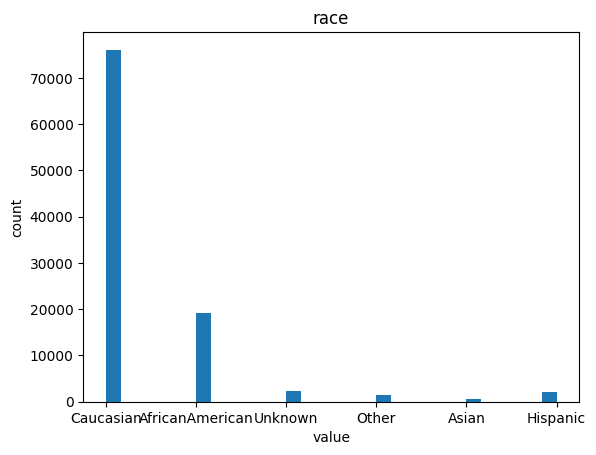

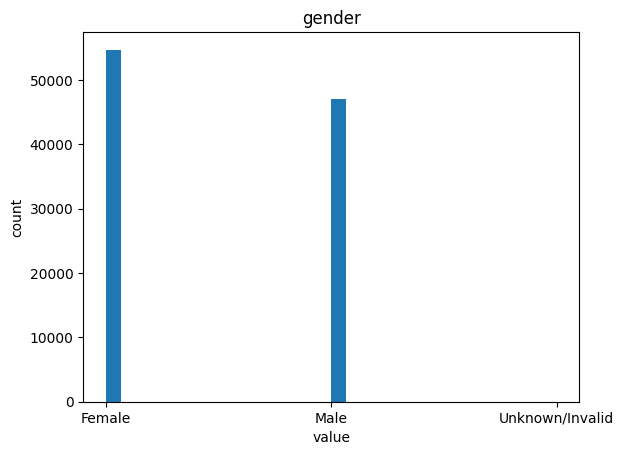

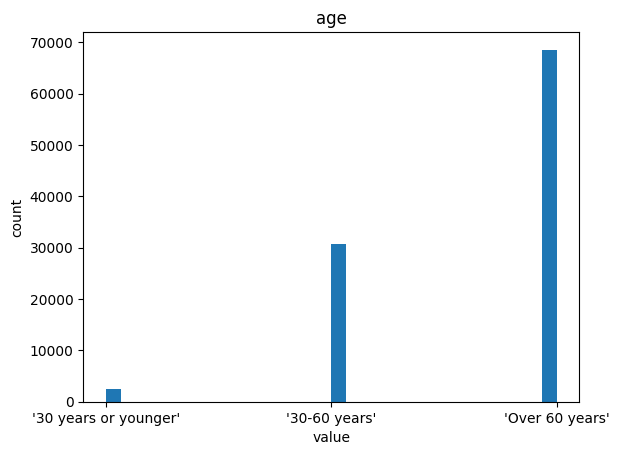

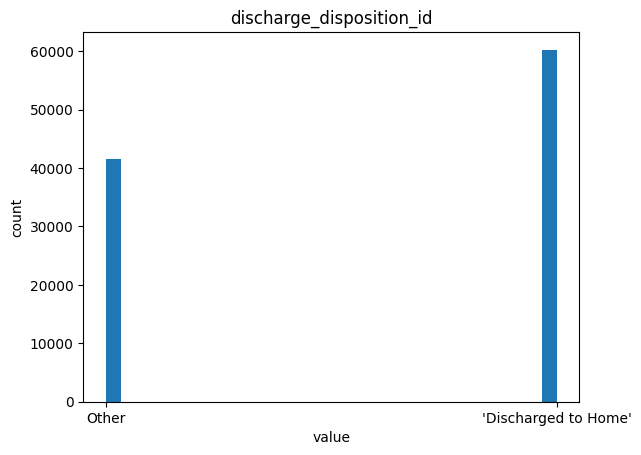

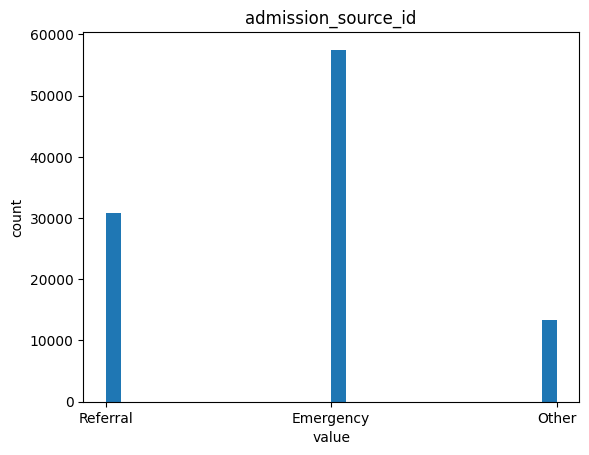

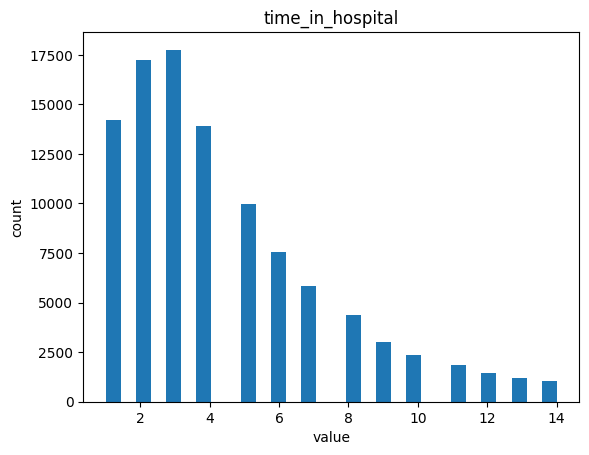

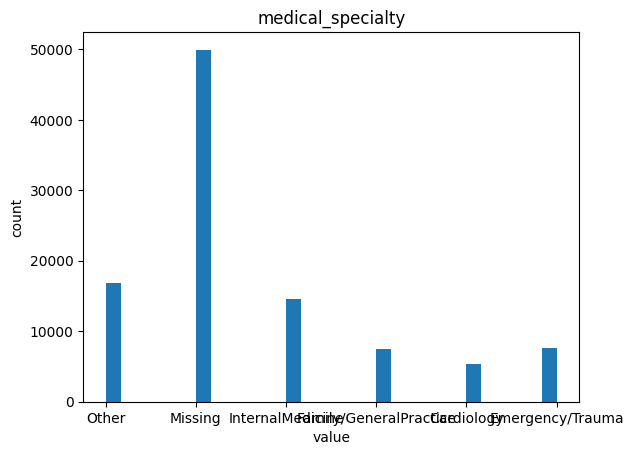

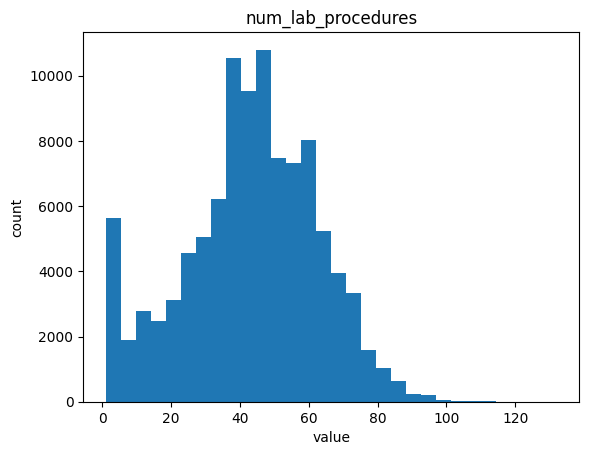

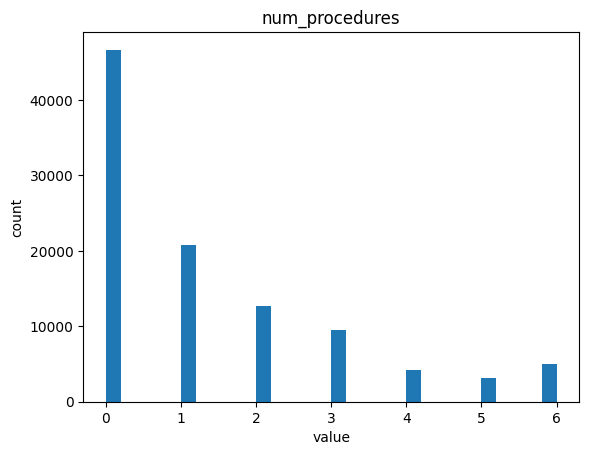

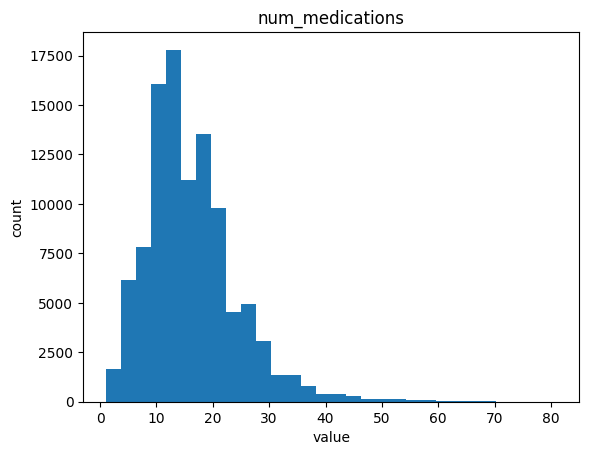

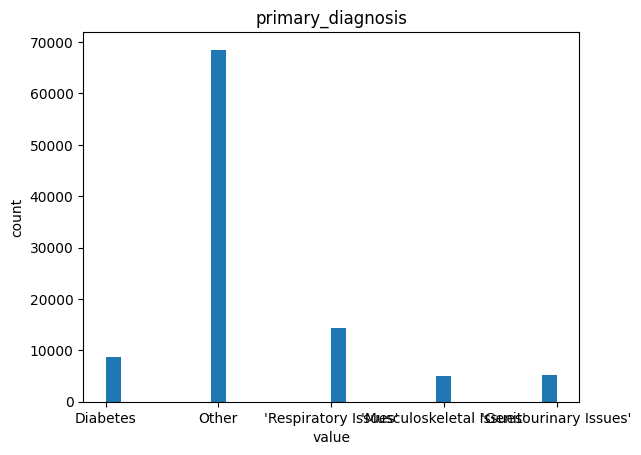

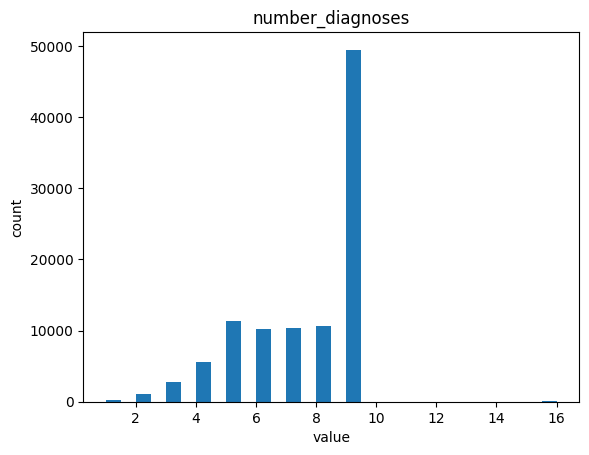

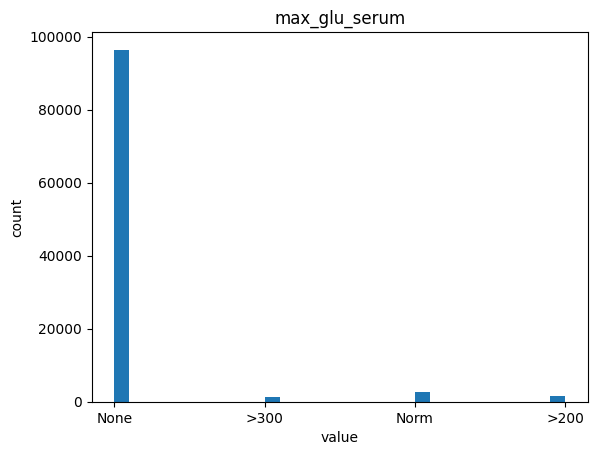

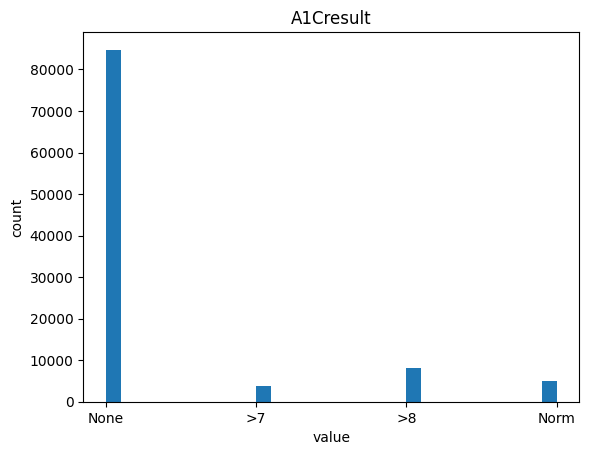

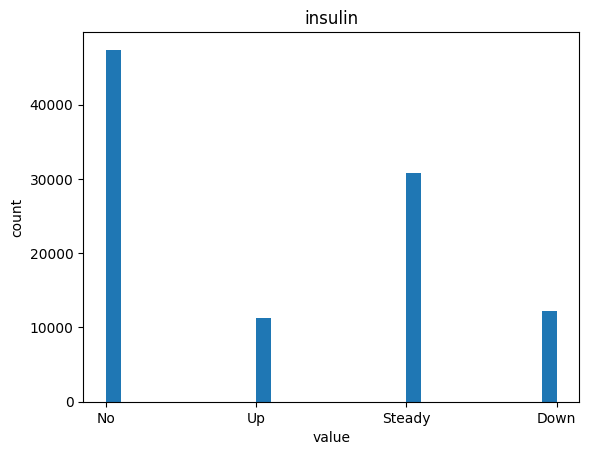

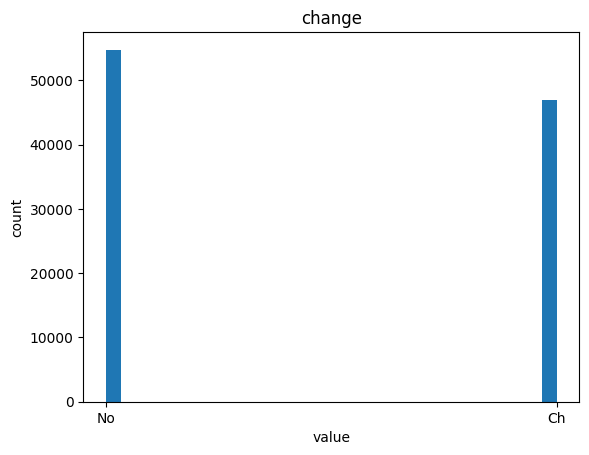

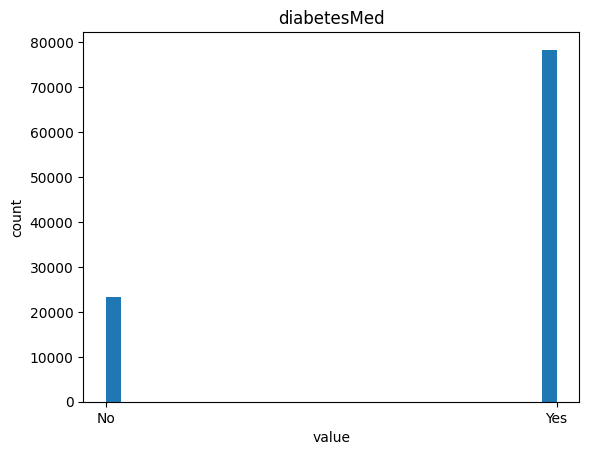

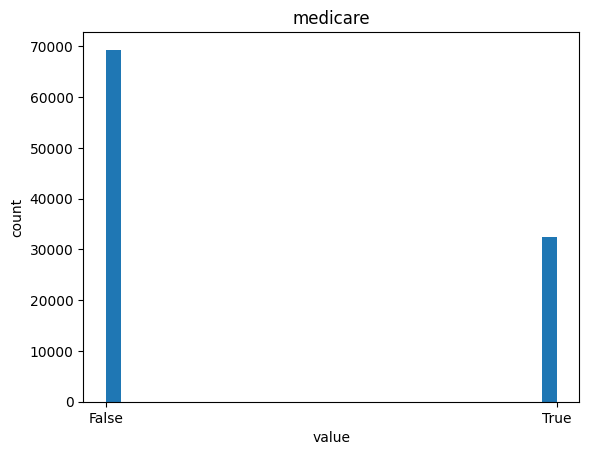

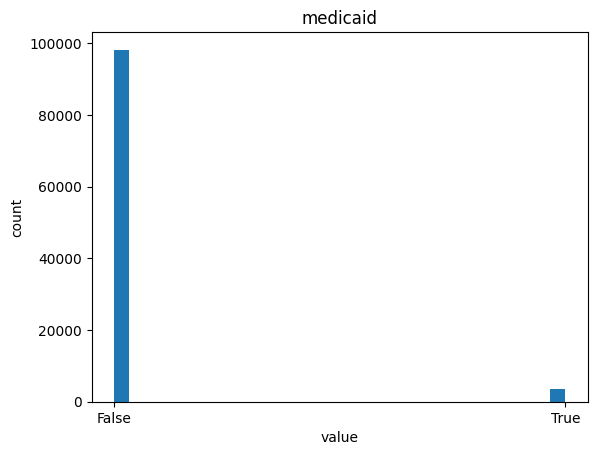

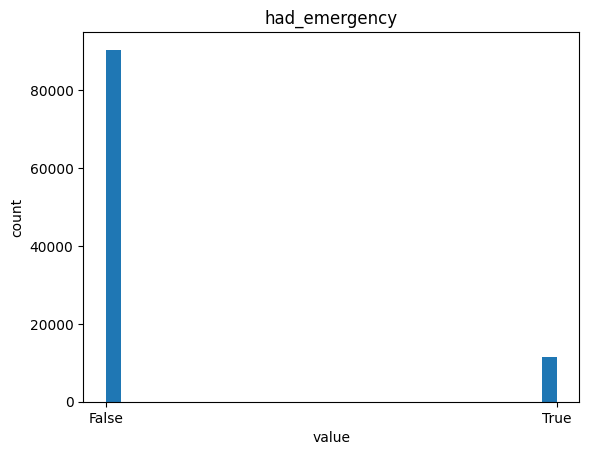

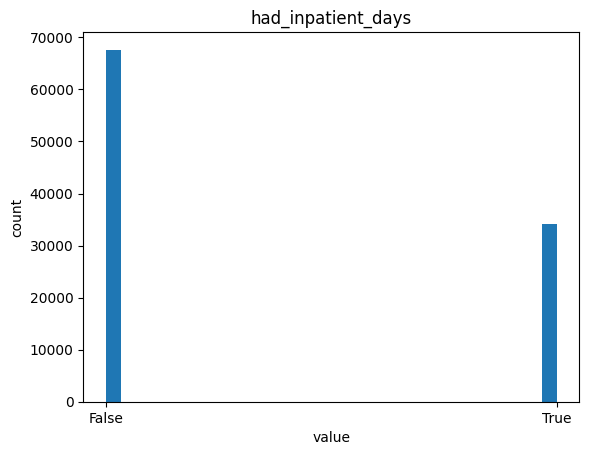

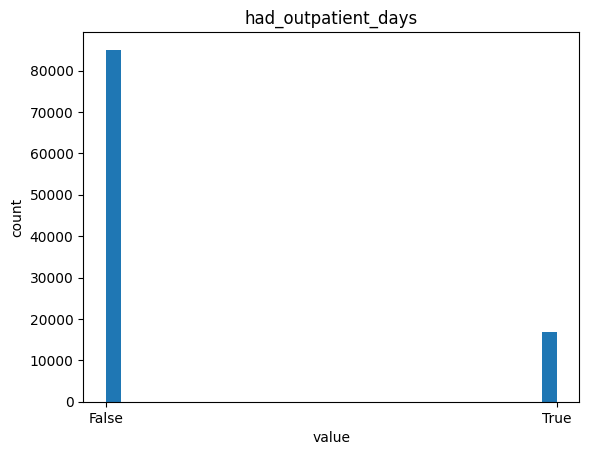

In [15]:
for column in columns:
    t_column = X[column]
    histogram_plot(t_column, column)

In [16]:
A_race = X['race']
A_gender = X['gender']
print(A_race.value_counts(dropna=False).head(10))
print(A_gender.value_counts(dropna=False))

race
Caucasian          76099
AfricanAmerican    19210
Unknown             2273
Hispanic            2037
Other               1506
Asian                641
Name: count, dtype: int64
gender
Female             54708
Male               47055
Unknown/Invalid        3
Name: count, dtype: int64


In [18]:
# race x gender
A_intersection = A_race.astype(str) + '|' + A_gender.astype(str)

intersection_counts = A_intersection.value_counts()
intersection_counts.head(15)

Caucasian|Female           39689
Caucasian|Male             36410
AfricanAmerican|Female     11728
AfricanAmerican|Male        7482
Unknown|Male                1138
Unknown|Female              1133
Hispanic|Female             1092
Hispanic|Male                945
Other|Male                   757
Other|Female                 748
Asian|Male                   323
Asian|Female                 318
Unknown|Unknown/Invalid        2
Other|Unknown/Invalid          1
Name: count, dtype: int64

In [21]:
counts = A_intersection.value_counts()
small_groups = counts[counts < 200]
len(small_groups), small_groups.head(10)

(2,
 Unknown|Unknown/Invalid    2
 Other|Unknown/Invalid      1
 Name: count, dtype: int64)

In [19]:
df_data = X.copy()
df_data['y'] = y
df_data['race'] = A_race
df_data['gender'] = A_gender
df_data['race_gender'] = A_intersection

race_rate = df_data.groupby('race')['y'].mean().sort_values(ascending=False)
gender_rate = df_data.groupby('gender')['y'].mean().sort_values(ascending=False)
intersection_rate = df_data.groupby('race_gender')['y'].mean().sort_values(ascending=False)

race_rate, gender_rate, intersection_rate.head(15)

(race
 Caucasian          0.112906
 AfricanAmerican    0.112181
 Hispanic           0.104075
 Asian              0.101404
 Other              0.096282
 Unknown            0.082710
 Name: y, dtype: float64,
 gender
 Female             0.112452
 Male               0.110615
 Unknown/Invalid    0.000000
 Name: y, dtype: float64,
 race_gender
 Asian|Male                 0.126935
 Hispanic|Male              0.118519
 Caucasian|Female           0.114893
 AfricanAmerican|Male       0.114274
 AfricanAmerican|Female     0.110846
 Caucasian|Male             0.110739
 Other|Female               0.102941
 Hispanic|Female            0.091575
 Other|Male                 0.089828
 Unknown|Male               0.085237
 Unknown|Female             0.080318
 Asian|Female               0.075472
 Other|Unknown/Invalid      0.000000
 Unknown|Unknown/Invalid    0.000000
 Name: y, dtype: float64)

In [22]:
os.makedirs('../reports', exist_ok=True)

race_rate.to_csv('../reports/race_rate.csv')
gender_rate.to_csv('../reports/gender_rate.csv')
intersection_rate.to_csv('../reports/intersection_rate.csv')
counts.to_csv('../reports/intersection_counts.csv')